In [1]:
import pandas as pd
import numpy as np

In [2]:
# =================================================================
# 1. COLLECT FINAL PERFORMANCE METRICS
# =================================================================
# Objective: Consolidate final R2 and MAE scores from all competing models
# Note: Update competitor scores (Decision Tree, Lasso, Linear, KNN) 
#       with actual metrics from team members' notebooks before running.

model_data = {
    'Model Name': [
        'Random Forest Regressor (Pritilata)',
        'Decision Tree Regressor (Dhrubajit)',
        'Lasso Regression (Shriyut)',
        'Linear Regression (Shriyut)',
        'KNN Regressor (Subhadip)'
    ],
    'R2_Score': [
        0.9789,  # Champion Score (Updated to actual verified R2)
        0.9769,  # Competitor Score (Update this example value)
        0.8175,  # Competitor Score (Update this example value)
        0.8176,  # Competitor Score (Update this example value)
        0.9724   # Competitor Score (Update this example value)
    ],
    'MAE': [
        847.67,  # Champion MAE (Updated to actual verified MAE)
        379.02, # Competitor MAE (Update this example value)
        3674.31, # Competitor MAE (Update this example value)
        3674.17, # Competitor MAE (Update this example value)
        1083.87  # Competitor MAE (Update this example value)
    ]
}

df_comparison = pd.DataFrame(model_data)

In [3]:
# =================================================================
# 2. RANKING AND ARTIFACT IDENTIFICATION
# =================================================================
# Rank models by R2 score in descending order (highest R2 is best)
df_comparison = df_comparison.sort_values(by='R2_Score', ascending=False)

# Format R2 score for presentation (e.g., 0.9789 -> '97.89%')
df_comparison['R2_Score_Formatted'] = (df_comparison['R2_Score'] * 100).round(2).astype(str) + '%'

# Identify the officially selected Champion Model
# Note: The R2 score in the condition MUST match the Champion R2_Score value above (0.9789)
df_comparison['Status'] = np.where(df_comparison['R2_Score'] == 0.9789, '🏆 CHAMPION ARTIFACT', 'Competitor')

# Select and order the columns for final display
df_final = df_comparison[['Model Name', 'R2_Score_Formatted', 'MAE', 'Status']]

# Print the comparison table in Markdown format for easy documentation update
print("Final Model Comparison Table:")
print("-" * 60)
print(df_final.to_string(index=False))

Final Model Comparison Table:
------------------------------------------------------------
                         Model Name R2_Score_Formatted     MAE              Status
Random Forest Regressor (Pritilata)             97.89%  847.67 🏆 CHAMPION ARTIFACT
Decision Tree Regressor (Dhrubajit)             97.69%  379.02          Competitor
           KNN Regressor (Subhadip)             97.24% 1083.87          Competitor
        Linear Regression (Shriyut)             81.76% 3674.17          Competitor
         Lasso Regression (Shriyut)             81.75% 3674.31          Competitor


C:\Users\SHRIYUT\AppData\Local\Temp\ipykernel_4616\2769152509.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=df_plot, palette=colors)


✅ Chart saved as '03_Model_Comparison.png'


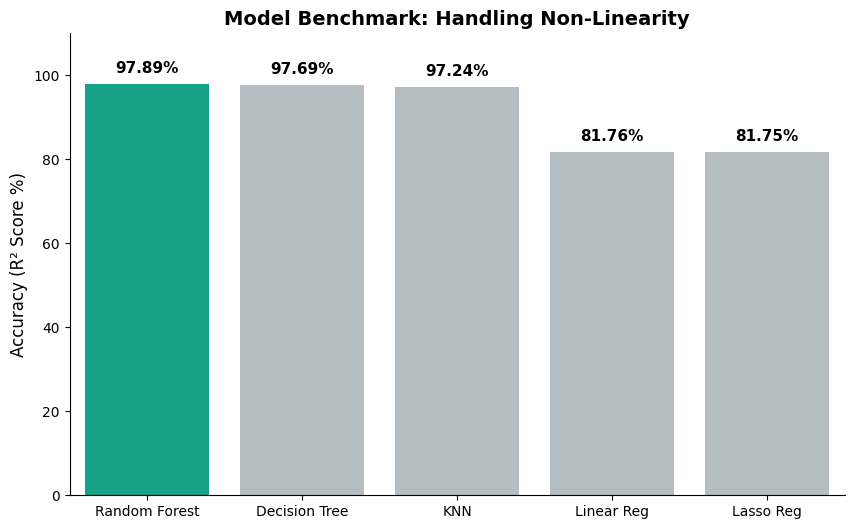

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Prepare the Data (Using your EXACT values)
data = {
    'Model': ['Random Forest', 'Decision Tree', 'KNN', 'Linear Reg', 'Lasso Reg'],
    'Accuracy': [97.89, 97.69, 97.24, 81.76, 81.75]
}
df_plot = pd.DataFrame(data)

# 2. Setup the Plot
plt.figure(figsize=(10, 6))
# Color Logic: Green for Champion, Gray for others
colors = ['#00b894' if x == 97.89 else '#b2bec3' for x in df_plot['Accuracy']]

ax = sns.barplot(x='Model', y='Accuracy', data=df_plot, palette=colors)

# 3. Styling
plt.ylim(0, 110)  # Give space for text
plt.ylabel('Accuracy (R² Score %)', fontsize=12)
plt.title('Model Benchmark: Handling Non-Linearity', fontsize=14, fontweight='bold')
plt.xlabel('')

# 4. Add the numbers on top of the bars
for i, v in enumerate(df_plot['Accuracy']):
    ax.text(i, v + 2, f"{v}%", ha='center', va='bottom', fontweight='bold', fontsize=11)

# 5. Clean up borders
sns.despine()

# 6. Save and Show
plt.savefig("03_Model_Comparison.png", dpi=300, bbox_inches='tight')
print("✅ Chart saved as '03_Model_Comparison.png'")
plt.show()

In [5]:
import os  # Import OS library to handle folder paths.

# =================================================================
# 3. PERSISTENCE (Saving Comparison Data)
# =================================================================
# Objective: Save the DataFrame to a CSV file, ensuring the directory exists.

# Define the output directory and file name
output_dir = '../data/processed'
file_name = 'final_model_comparison.csv'
full_path = os.path.join(output_dir, file_name)

# CRITICAL STEP: Check if directory exists; if not, create it.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"📁 Created missing directory: {output_dir}")

# Save the complete comparison DataFrame
try:
    df_comparison.to_csv(full_path, index=False)
    print(f"✅ Comparison data successfully saved at: {full_path}")
except Exception as e:
    print(f"❌ Error saving file: {e}")

✅ Comparison data successfully saved at: ../data/processed\final_model_comparison.csv
